3.1.0


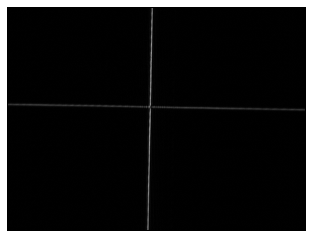

In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt
import cv2
print (cv2.__version__)

img = cv2.imread("20160872701.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray",interpolation="bicubic")
plt.xticks([]),plt.yticks([]) # to hide the tick value on x and y axis
plt.show()

#cv2.namedWindow("image",cv2.WINDOW_NORMAL)
#cv2.imshow("image", img)
#cv2.waitKey()
#cv2.destroyAllWindows

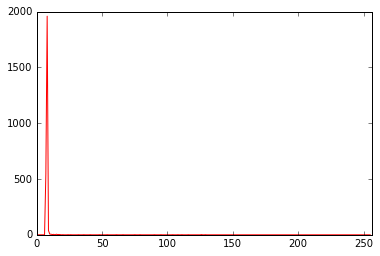

In [2]:
hist = cv2.calcHist(img, [0],None,[256],[0,256])
plt.plot(hist, color='r')
#plt.ylim([0,5])
plt.xlim([0,256])
plt.show()

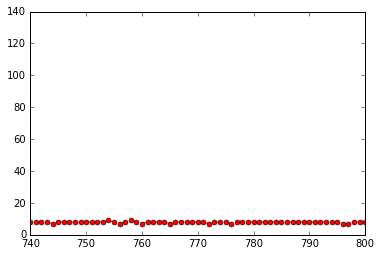

In [3]:
profile = img[972,:]
plt.plot(profile, color='r',linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
#plt.xlim(Tcindex[0],Tcindex[-1])
plt.xlim(740,800)
plt.show()

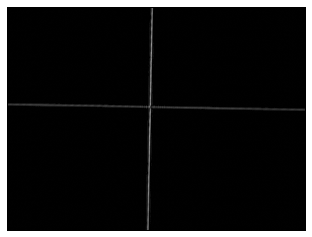

In [4]:
ret,thred = cv2.threshold(img, 13, 255, cv2.THRESH_TOZERO)
plt.imshow(thred, cmap="gray",interpolation="bicubic")
plt.xticks([]),plt.yticks([]) # to hide the tick value on x and y axis
plt.show()

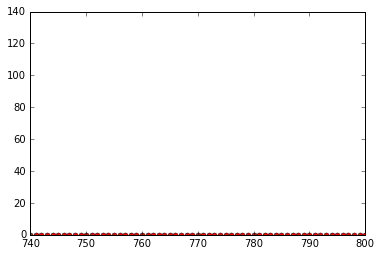

In [5]:
profile = thred[972,:]
plt.plot(profile, color='r',linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
#plt.xlim(Tcindex[0],Tcindex[-1])
plt.xlim(740,800)
plt.show()

In [6]:
thred.sum()

6333070

<function matplotlib.pyplot.show>

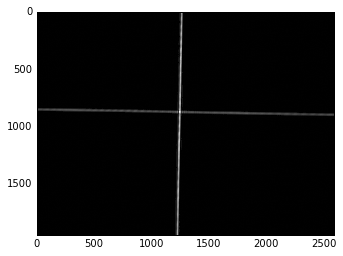

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
cv2.erode (thred,kernel,thred,iterations = 2)
cv2.dilate(thred,kernel,thred,iterations = 3)
plt.imshow(thred,cmap="gray",interpolation="bicubic")
plt.show

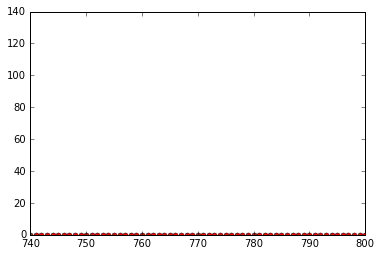

In [8]:
profile = thred[972,:]
plt.plot(profile, color='r',linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
#plt.xlim(Tcindex[0],Tcindex[-1])
plt.xlim(740,800)
plt.show()

In [9]:
row = thred.shape[0]
col = thred.shape[1]
print (row, col)

1944 2592


[ 0.  0.  0. ...,  0.  0.  0.]
28517.0885017
3516.71 8333.46
11850.17


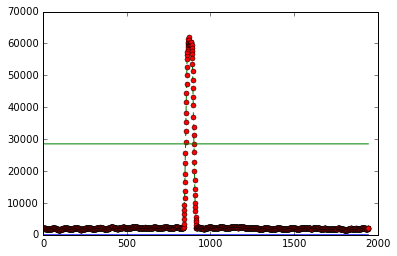

In [10]:
#rowsum = list(range(row))
#colsum = list(range(col))

rowsum = np.zeros(row)
print  (rowsum)
plt.plot(rowsum)

for i in range(row):
    for j in range(col):
        rowsum[i]+=thred.item(i,j)
        
rowthres = np.zeros(row)
rowthres = rowthres + (np.mean(rowsum)+np.std(rowsum)*3) 
print((np.mean(rowsum)+np.std(rowsum)*3))
print  ('%0.2f'%np.mean(rowsum),'%0.2f'%np.std(rowsum))
print ('%0.2f'%(np.mean(rowsum)+np.std(rowsum)))
plt.plot(rowsum, color='green', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.plot(rowthres)
#plt.xlim(1190,1220)
#plt.ylim(20.9,23)

6836491.0
2637.54 11294.54
36521.15


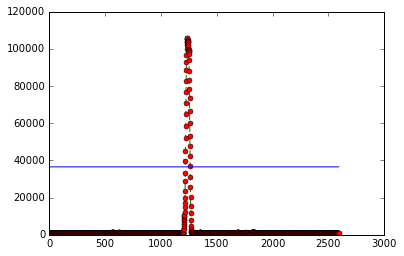

In [11]:
colsum = np.zeros(col)
for j in range(col):
    for i in range(row):
        colsum[j]+=thred.item(i,j)
        
colthres = np.zeros(col)
colthres = colthres + (np.mean(colsum)+np.std(colsum)*3)  

print(colsum.sum())
print  ('%0.2f'%np.mean(colsum),'%0.2f'%np.std(colsum))
print ('%0.2f'%(np.mean(colsum)+np.std(colsum)*3))
plt.plot(colsum, color='green',linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.plot(colthres)
#plt.xlim(900,950)
#plt.ylim(0,2000)

In [12]:
Trowsum = np.arange(len(rowsum))
Trindex = Trowsum[rowsum > (np.mean(rowsum)+np.std(rowsum)*3) ] 
print (Trindex)

[851 852 853 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868
 869 870 871 872 873 874 875 876 877 878 879 880 881 882 883 884 885 886
 887 888 889 890 891 892 893 894 895 896 897 898 899 900]


In [13]:
Tcolsum = np.arange(len(colsum))
Tcindex = Tcolsum[colsum > (np.mean(colsum)+np.std(colsum)*3)] 
print (Tcindex)

[1218 1219 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229 1230 1231 1232
 1233 1234 1235 1236 1237 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247
 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261]


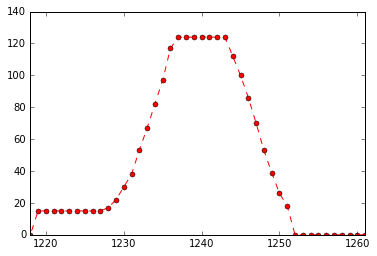

In [14]:
profile = thred[972,:]
plt.plot(profile, color='r',linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.xlim(Tcindex[0],Tcindex[-1])
#plt.xlim(740,800)
plt.show()

[ 0.  0.  0. ...,  0.  0.  0.]


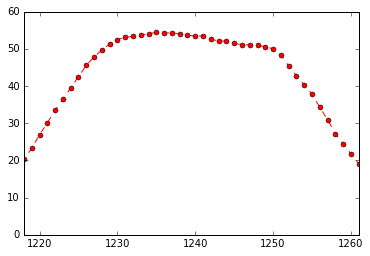

In [15]:
lens=(len(Tcindex))
grayhist= np.zeros(col)
for i in range(lens):
    grayhist[Tcindex[i]]=thred[:,Tcindex[i]].mean()
    
print(grayhist)    
plt.plot(grayhist, color='r',linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.xlim(Tcindex[0],Tcindex[-1])
plt.show()

[ 0.  0.  0. ...,  0.  0.  0.]


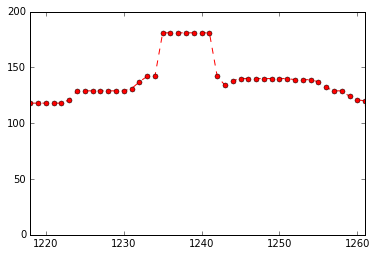

In [16]:
lens=(len(Tcindex))
grayhist= np.zeros(col)
for i in range(lens):
    grayhist[Tcindex[i]]=thred[:,Tcindex[i]].max()
    
print(grayhist)    
plt.plot(grayhist, color='r',linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.xlim(Tcindex[0],Tcindex[-1])
plt.show()

(0, 851) (2592, 900)
(1218, 0) (1261, 1944)


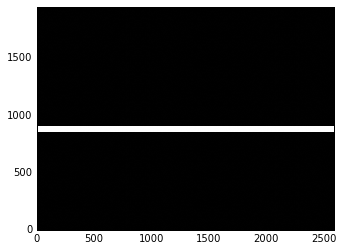

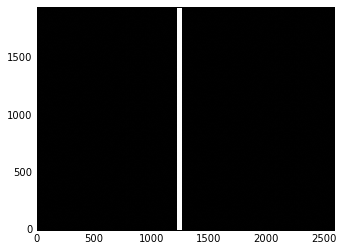

In [17]:
rowROI = np.zeros(thred.shape[:2], dtype = "uint8")
colROI = np.zeros(thred.shape[:2], dtype = "uint8")

if Trindex.size != 0:
    cv2.rectangle(rowROI,(0,Trindex[0]),(col,Trindex[-1]),255,-1)
    print((0,Trindex[0]),(col,Trindex[-1]))
    
if Tcindex.size != 0:
    cv2.rectangle(colROI,(Tcindex[0],0),(Tcindex[-1],row),255,-1)
    print((Tcindex[0],0),(Tcindex[-1],row))

#cv2.rectangle(rowROI,(0,Trindex[0]),(col,Trindex[-1]),255,-1)
#print((0,Trindex[0]),(col,Trindex[-1]))
#cv2.rectangle(colROI,(Tcindex[0],0),(Tcindex[-1],row),255,-1)
#print((Tcindex[0],0),(Tcindex[-1],row))

plt.imshow(rowROI,cmap="gray",interpolation="bicubic")
plt.ylim(0,row)
plt.xlim(0,col)
plt.show()
plt.imshow(colROI,cmap="gray",interpolation="bicubic")
plt.ylim(0,row)
plt.xlim(0,col)
plt.show()

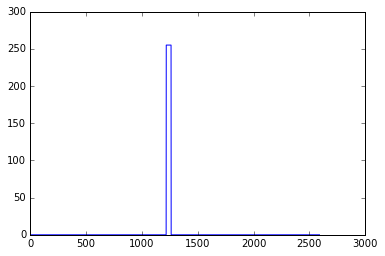

In [18]:
plt.plot(colROI[0,:])
plt.show()

(1944, 2592)


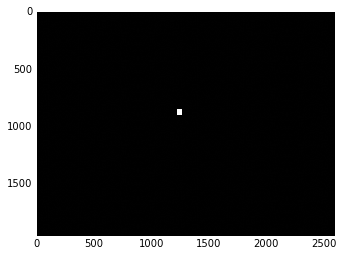

In [19]:
intersection = np.zeros(thred.shape[:2], dtype = "uint8")
cv2.bitwise_and(rowROI,colROI,intersection)
print (intersection.shape)
#cv2.imshow("window",intersection)
plt.imshow(intersection,cmap="gray",interpolation="bicubic")

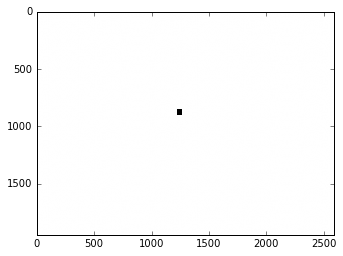

In [20]:
cv2.bitwise_not(intersection,intersection)
plt.imshow(intersection, cmap="gray",interpolation="bicubic")

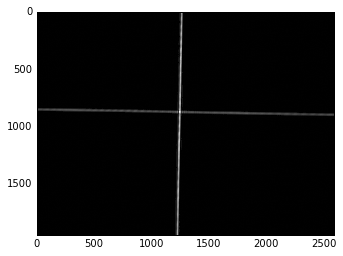

In [21]:
plt.imshow(thred, cmap="gray", interpolation = "bicubic")

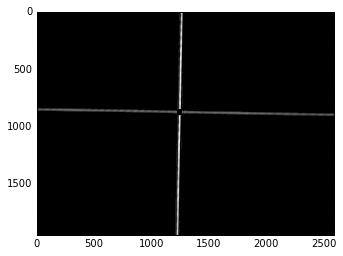

In [22]:
thred = cv2.bitwise_and(intersection,thred)
plt.imshow(thred, cmap="gray", interpolation="bicubic")

In [23]:
#cv2.namedWindow("image",cv2.WINDOW_NORMAL)
#cv2.imshow("image", thred)
#cv2.waitKey(5000)
#cv2.destroyAllWindows

1239.21 948.49
19.08 89.00
(0, 0)


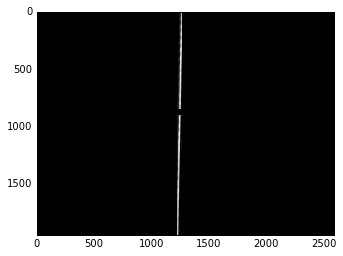

In [24]:
colImg = cv2.bitwise_and(thred, colROI)
mu = cv2.moments(colImg)
cx = mu['m10']/mu['m00']
cy = mu['m01']/mu['m00']
covMat = np.zeros((2,2))
covMat[0][0] = (mu['m20']-mu['m10']*mu['m10']/mu['m00'])/mu['m00']
covMat[0][1] = (mu['m11']-mu['m10']*mu['m01']/mu['m00'])/mu['m00']
covMat[1][0] = covMat[0][1]
covMat[1][1] = (mu['m02']-mu['m01']*mu['m01']/mu['m00'])/mu['m00']
eigenValue = np.zeros_like(covMat)
eigenVector = np.zeros_like(covMat)
ret, eigenValue, eigenVector = cv2.eigen(covMat)
min_val, max_val, min_loc, max_loc =cv2.minMaxLoc(eigenValue)

linewidth =(min_val*9.21034)**0.5
lineangle = math.atan2(eigenVector[max_loc[0]][1],eigenVector[max_loc[1]][0])
lineangle = 180-lineangle*180/math.pi
print('%.2f'%cx, '%.2f'%cy)
print('%.2f'%linewidth, '%.2f'%lineangle)
print(max_loc)
plt.imshow(colImg, cmap="gray", interpolation="bicubic")
plt.show()

1255.13 875.65
19.55 179.05
[[  4.89785904e+05   8.13766445e+03]
 [  8.13766445e+03   1.76733041e+02]]


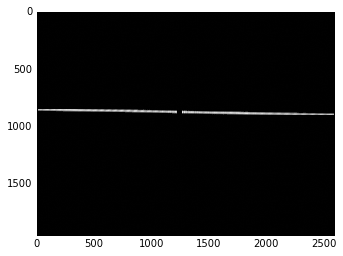

In [25]:
rowImg = cv2.bitwise_and(thred, rowROI)
mu = cv2.moments(rowImg)
cx = mu['m10']/mu['m00']
cy = mu['m01']/mu['m00']
covMat = np.zeros((2,2))
covMat[0][0] = (mu['m20']-mu['m10']*mu['m10']/mu['m00'])/mu['m00']
covMat[0][1] = (mu['m11']-mu['m10']*mu['m01']/mu['m00'])/mu['m00']
covMat[1][0] = covMat[0][1]
covMat[1][1] = (mu['m02']-mu['m01']*mu['m01']/mu['m00'])/mu['m00']
eigenValue = np.zeros_like(covMat)
eigenVector = np.zeros_like(covMat)
ret, eigenValue, eigenVector = cv2.eigen(covMat)
min_val, max_val, min_loc, max_loc =cv2.minMaxLoc(eigenValue)

linewidth =(min_val*9.21034)**0.5
lineangle = math.atan2(eigenVector[max_loc[0]][1],eigenVector[max_loc[1]][0])
lineangle = 180-lineangle*180/math.pi
print('%.2f'%cx, '%.2f'%cy)
print('%.2f'%linewidth, '%.2f'%lineangle)
print(covMat)
plt.imshow(rowImg, cmap="gray", interpolation="bicubic")
#plt.ylim(700,1100)
plt.show()